In [1]:
import numpy as np 
import pandas as pd 
import os 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
casual_df=pd.read_csv('CASUALTIES.csv')
accident_df=pd.read_csv('ACCIDENTS.csv')
vehicle_df=pd.read_csv('VEHICLE.csv')

In [3]:
casual_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1.0,0.0,1.0
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1.0,11.0,1.0
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1.0,9.0,1.0
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1.0,0.0,1.0
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1.0,3.0,-1.0


In [4]:
accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0.0,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863


In [5]:
vehicle_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0.0,0.0,0.0,0.0,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,1,11,0,4,0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,1,11,0,17,0,0.0,0.0,4.0,0.0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,2,9,0,2,0,0.0,0.0,0.0,0.0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,1,9,0,18,0,0.0,0.0,0.0,0.0,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46209 entries, 0 to 46208
Data columns (total 32 columns):
Accident_Index                                 46209 non-null object
Location_Easting_OSGR                          46196 non-null float64
Location_Northing_OSGR                         46196 non-null float64
Longitude                                      46196 non-null float64
Latitude                                       46196 non-null float64
Police_Force                                   46209 non-null int64
Accident_Severity                              46209 non-null int64
Number_of_Vehicles                             46209 non-null int64
Number_of_Casualties                           46209 non-null int64
Date                                           46209 non-null object
Day_of_Week                                    46209 non-null int64
Time                                           46208 non-null object
Local_Authority_(District)                     46209 non-null in

In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65962 entries, 0 to 65961
Data columns (total 22 columns):
Accident_Index                      65962 non-null object
Vehicle_Reference                   65962 non-null int64
Vehicle_Type                        65962 non-null int64
Towing_and_Articulation             65962 non-null int64
Vehicle_Manoeuvre                   65962 non-null int64
Vehicle_Location-Restricted_Lane    65962 non-null int64
Junction_Location                   65961 non-null float64
Skidding_and_Overturning            65961 non-null float64
Hit_Object_in_Carriageway           65961 non-null float64
Vehicle_Leaving_Carriageway         65961 non-null float64
Hit_Object_off_Carriageway          65961 non-null float64
1st_Point_of_Impact                 65961 non-null float64
Was_Vehicle_Left_Hand_Drive?        65961 non-null float64
Journey_Purpose_of_Driver           65961 non-null float64
Sex_of_Driver                       65961 non-null float64
Age_of_Driver    

In [8]:
casual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 15 columns):
Accident_Index                        23053 non-null object
Vehicle_Reference                     23053 non-null int64
Casualty_Reference                    23053 non-null int64
Casualty_Class                        23053 non-null int64
Sex_of_Casualty                       23053 non-null int64
Age_of_Casualty                       23053 non-null int64
Age_Band_of_Casualty                  23053 non-null int64
Casualty_Severity                     23053 non-null int64
Pedestrian_Location                   23053 non-null int64
Pedestrian_Movement                   23053 non-null int64
Car_Passenger                         23053 non-null int64
Bus_or_Coach_Passenger                23053 non-null int64
Pedestrian_Road_Maintenance_Worker    23052 non-null float64
Casualty_Type                         23052 non-null float64
Casualty_Home_Area_Type               23052 non-null float64

In [9]:
first_df=pd.merge(casual_df,accident_df,on='Accident_Index')

In [10]:
df=pd.merge(first_df,vehicle_df,on='Accident_Index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42351 entries, 0 to 42350
Data columns (total 67 columns):
Accident_Index                                 42351 non-null object
Vehicle_Reference_x                            42351 non-null int64
Casualty_Reference                             42351 non-null int64
Casualty_Class                                 42351 non-null int64
Sex_of_Casualty                                42351 non-null int64
Age_of_Casualty                                42351 non-null int64
Age_Band_of_Casualty                           42351 non-null int64
Casualty_Severity                              42351 non-null int64
Pedestrian_Location                            42351 non-null int64
Pedestrian_Movement                            42351 non-null int64
Car_Passenger                                  42351 non-null int64
Bus_or_Coach_Passenger                         42351 non-null int64
Pedestrian_Road_Maintenance_Worker             42348 non-null float64
Casu

In [11]:
df.isnull().sum()

Accident_Index                                  0
Vehicle_Reference_x                             0
Casualty_Reference                              0
Casualty_Class                                  0
Sex_of_Casualty                                 0
Age_of_Casualty                                 0
Age_Band_of_Casualty                            0
Casualty_Severity                               0
Pedestrian_Location                             0
Pedestrian_Movement                             0
Car_Passenger                                   0
Bus_or_Coach_Passenger                          0
Pedestrian_Road_Maintenance_Worker              3
Casualty_Type                                   3
Casualty_Home_Area_Type                         3
Location_Easting_OSGR                           0
Location_Northing_OSGR                          0
Longitude                                       0
Latitude                                        0
Police_Force                                    0


In [12]:
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)

In [13]:
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)

In [14]:
df.dropna(subset=['Time'],axis=0,inplace=True)

In [15]:
df.isnull().values.any()

True

The data is almost cleaned and ready to use.

EXPLORATORY DATA ANALYSIS

Q1.Is there any relationship between the timing of the accident and number of fatal accidents?

In [16]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [17]:
def month(string):
    return int(string[3:5])
df['Month']=df['Date'].apply(lambda x: month(x))

In [18]:
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [19]:
q1_df=pd.DataFrame(data=df,columns=['Hour','Day_of_Week','Month','Accident_Severity'])

In [20]:
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
0,17,3,1,2
1,17,4,1,3
2,0,5,1,3
3,0,5,1,3
4,10,6,1,3


In [21]:
q1_df=q1_df[q1_df.Accident_Severity ==1]
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
1646,18,4,5,1
1647,18,4,5,1
1648,18,4,5,1
1649,18,4,5,1
34637,9,4,11,1


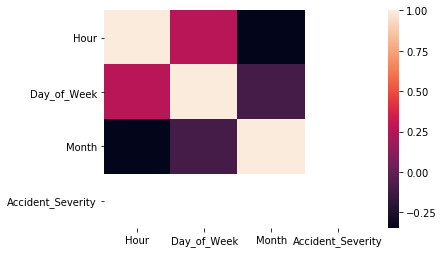

In [22]:
sns.heatmap(q1_df.corr())

In [23]:
q2_df=  pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver', 'Number_of_Casualties','Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])

In [24]:
q2_df=q2_df[q2_df.Sex_of_Driver !=-1]
q2_df.head()

,Journey_Purpose_of_Driver,Number_of_Casualties,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,15.0,1,2.0,74.0,10.0,1.0
1,1.0,1,1.0,42.0,7.0,-1.0
2,1.0,1,1.0,35.0,6.0,1.0
3,15.0,1,1.0,62.0,9.0,1.0
4,15.0,1,2.0,49.0,8.0,1.0


In [25]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q2_df.Age_Band_of_Driver=q2_df.Age_Band_of_Driver.map(map_df_age)
q2_df.Journey_Purpose_of_Driver=q2_df.Journey_Purpose_of_Driver.map(map_df)
q2_df.Driver_Home_Area_Type=q2_df.Driver_Home_Area_Type.map(map_df_area)
q2_df.head()

,Journey_Purpose_of_Driver,Number_of_Casualties,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,Not known/Other,1,2.0,74.0,66 - 75,Urban Area
1,Journey as part of work,1,1.0,42.0,36 - 45,NaN
2,Journey as part of work,1,1.0,35.0,26 - 35,Urban Area
3,Not known/Other,1,1.0,62.0,56 - 65,Urban Area
4,Not known/Other,1,2.0,49.0,46 - 55,Urban Area


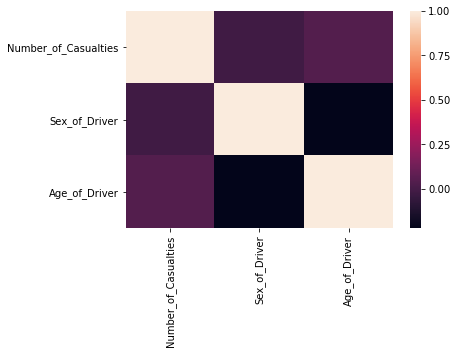

In [26]:
sns.heatmap(q2_df.corr())

Text(0.5, 1.0, 'Number_of_Casualties vs Age_of_Driver')

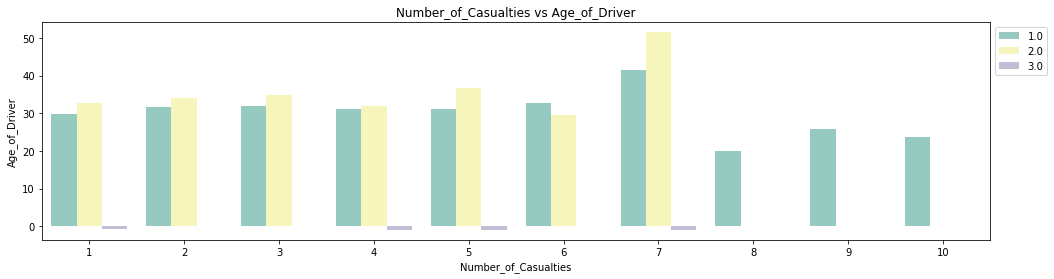

In [27]:
plt.figure(figsize=(17,4))
sns.barplot('Number_of_Casualties','Age_of_Driver',hue='Sex_of_Driver',data=q2_df,ci=None, palette='Set3')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Number_of_Casualties vs Age_of_Driver')

It can be inferred that the Drivers who met with an accident were in the age range of 30-50 years and are males.

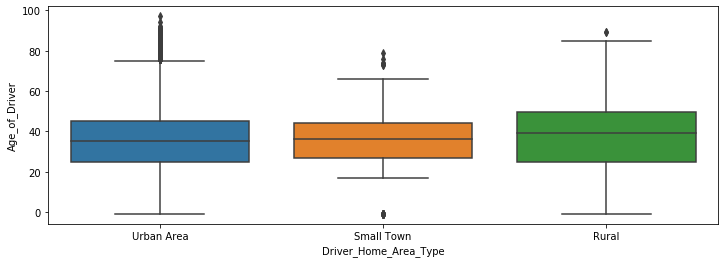

In [28]:
plt.figure(figsize=(12,4))
sns.boxplot('Driver_Home_Area_Type','Age_of_Driver',data=q2_df)

Q3. How does the weather impact the severity of accidents?

In [29]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Month,Hour
0,200501BS00001,1,1,3,1,37,7,2,1,1,...,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0,1,17
1,200501BS00002,1,1,2,1,37,7,3,0,0,...,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0,1,17
2,200501BS00003,2,1,1,1,62,9,3,0,0,...,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0,1,0
3,200501BS00003,2,1,1,1,62,9,3,0,0,...,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0,1,0
4,200501BS00004,1,1,3,1,30,6,3,5,2,...,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0,1,10


In [30]:
q3_df=pd.DataFrame(data=df,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Hour'])

In [31]:
q3_df.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour
0,2,1.0,2.0,17
1,3,4.0,1.0,17
2,3,4.0,1.0,0
3,3,4.0,1.0,0
4,3,1.0,1.0,10


In [32]:
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

In [33]:
q3_df['Time_of_Day']=q3_df['Hour'].apply(lambda x: time_of_day(x))
q3_df.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour,Time_of_Day
0,2,1.0,2.0,17,Evening
1,3,4.0,1.0,17,Evening
2,3,4.0,1.0,0,Night
3,3,4.0,1.0,0,Night
4,3,1.0,1.0,10,Morning


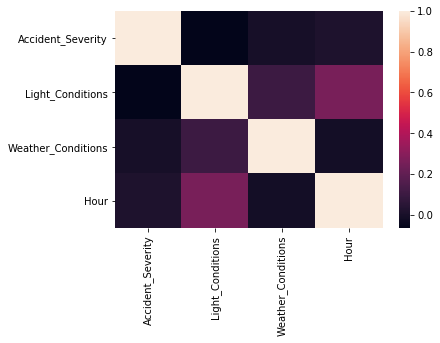

In [34]:
sns.heatmap(q3_df.corr())

Text(0.5, 1.0, 'Weather vs Hour_of_Accident')

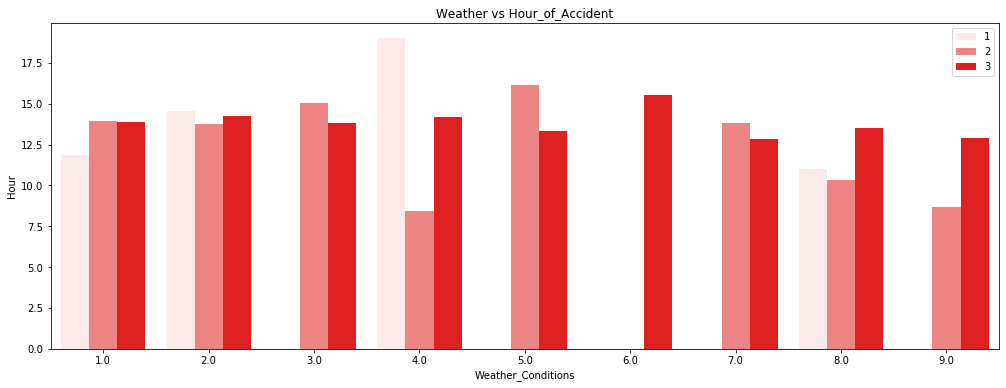

In [35]:
plt.figure(figsize=(17,6))
sns.barplot('Weather_Conditions','Hour',data=q3_df, hue='Accident_Severity',ci=None, color='red')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Hour_of_Accident')

Legend
1: Fatal
2: Serious
3: Slight

Weather Conditions
1: Fine no high winds
2: Raining no high winds
3: Snowing no high winds
4: Fine + high winds
5: Raining + high winds
6: Snowing + high winds
7: Fog or mist
8: Other
9: Unknown

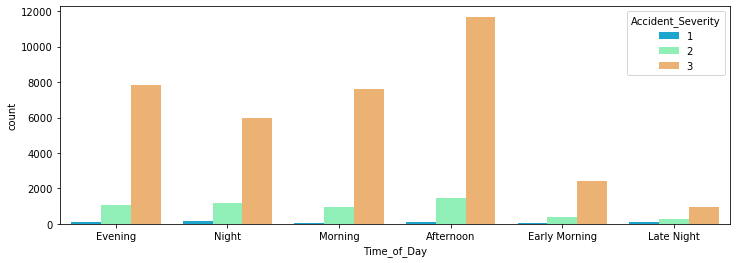

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='Time_of_Day',data=q3_df,hue='Accident_Severity',palette='rainbow')

In [37]:
df.Accident_Severity.value_counts()

3    36492
2     5316
1      543
Name: Accident_Severity, dtype: int64

Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident,
Accidents with Slight severity occured the most,
Accidents ususally took place when the Weather conditions were fine and also there were'nt any high winds : meaning which the weather conditions didn't effectively contribute to occurences of accidents.

Q4. Are certain designs of vehicles safer than others?

In [38]:
q4_df=pd.DataFrame(data=df,columns=['Vehicle_Type','Age_of_Vehicle','Was_Vehicle_Left_Hand_Drive?'
                                    ,'Propulsion_Code','Engine_Capacity_(CC)'])

In [39]:
q4_df=q4_df[q4_df.Vehicle_Type!=-1]

In [40]:
q4_df=q4_df[q4_df.Age_of_Vehicle!=-1]

In [41]:
q4_df=q4_df[q4_df.Propulsion_Code!=-1]

In [42]:
q4_df=q4_df[q4_df['Engine_Capacity_(CC)']!=-1]

In [43]:
map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
q4_df['Vehicle_Type']=q4_df.Vehicle_Type.map(map_vehicle_type)

In [44]:
map_prop={1:'Petrol',
2:'Heavy oil',
3:'Electric',
4:'Steam',
5:'Gas',
6:'Petrol/Gas (LPG)',
7:'Gas/Bi-fuel',
8:'Hybrid electric',
9:'Gas Diesel',
10:'New fuel technology',
11:'Fuel cells',
12:'Electric diesel'
}
q4_df['Propulsion_Code']=q4_df.Propulsion_Code.map(map_prop)

In [45]:
q4_df=q4_df[q4_df['Was_Vehicle_Left_Hand_Drive?']!=-1]
q4_df.head()

,Vehicle_Type,Age_of_Vehicle,Was_Vehicle_Left_Hand_Drive?,Propulsion_Code,Engine_Capacity_(CC)
1,Bus or coach (17 or more pass seats),3.0,1.0,Heavy oil,8268.0
2,Bus or coach (17 or more pass seats),5.0,1.0,Heavy oil,8300.0
3,Car,6.0,1.0,Petrol,1762.0
4,Car,4.0,1.0,Petrol,1769.0
5,Motorcycle 125cc and under,10.0,1.0,Petrol,85.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

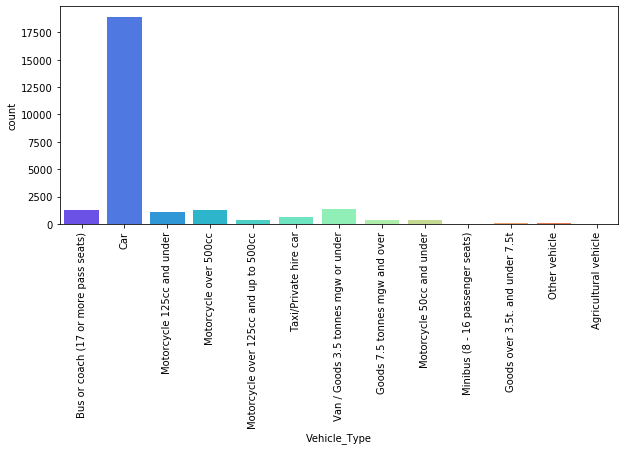

In [46]:
plt.figure(figsize=(10,4))
sns.countplot('Vehicle_Type',data=q4_df, palette='rainbow')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

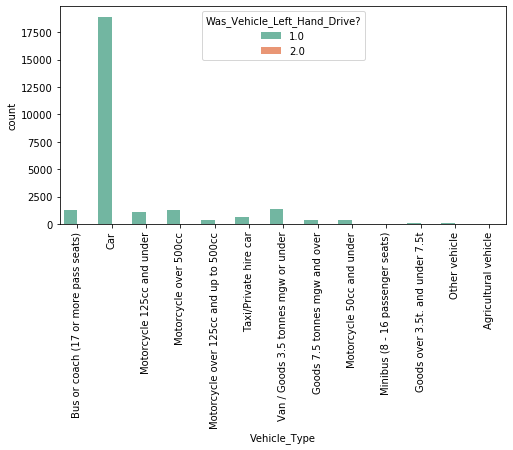

In [47]:
plt.figure(figsize=(8,4))
sns.countplot('Vehicle_Type',data=q4_df, hue='Was_Vehicle_Left_Hand_Drive?', palette='Set2')
plt.xticks(rotation=90)

The vehicles which met with an accident were Left-Hand-Drive type of vehicles.

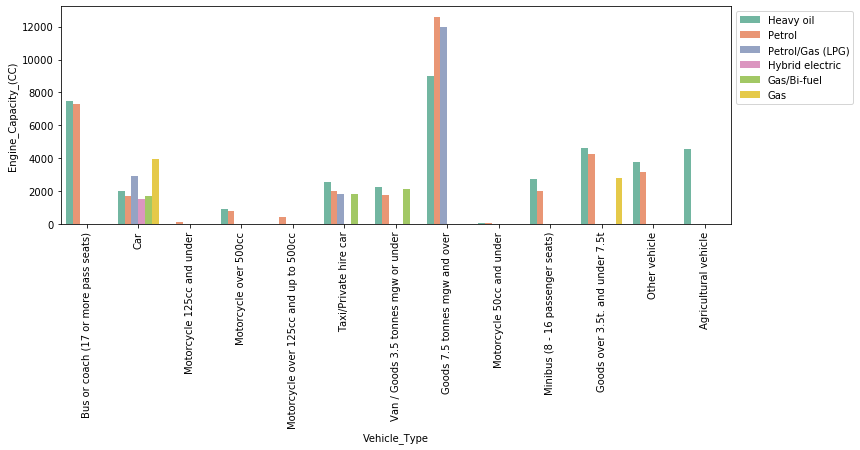

In [48]:
plt.figure(figsize=(12,4))
sns.barplot('Vehicle_Type','Engine_Capacity_(CC)',data=q4_df, hue='Propulsion_Code', palette='Set2',ci=None)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1))

Cars had low Engine Capacity with all types of fuel, which could be a possible reason for accidents.

In [49]:
vehicle_df=pd.read_csv('VEHICLE.csv')

In [50]:
print(vehicle_df.shape)
vehicle_df.head()

(1455548, 22)


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
1,200501BS00002,1,11,0,4,0.0,3.0,0.0,0.0,0.0,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
2,200501BS00003,1,11,0,17,0.0,0.0,0.0,4.0,0.0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
3,200501BS00003,2,9,0,2,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
4,200501BS00004,1,9,0,18,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [51]:
list(vehicle_df)

['Accident_Index',
 'Vehicle_Reference',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Propulsion_Code',
 'Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

In [52]:
vehicle_df['Junction_Location'].value_counts()

 0.0    565908
 1.0    358239
 8.0    277436
 2.0     87088
 6.0     62442
 4.0     35146
 5.0     32233
 3.0     21742
-1.0      9809
 7.0      5504
Name: Junction_Location, dtype: int64

In [53]:
location = vehicle_df
location = location[location.Junction_Location != -1]

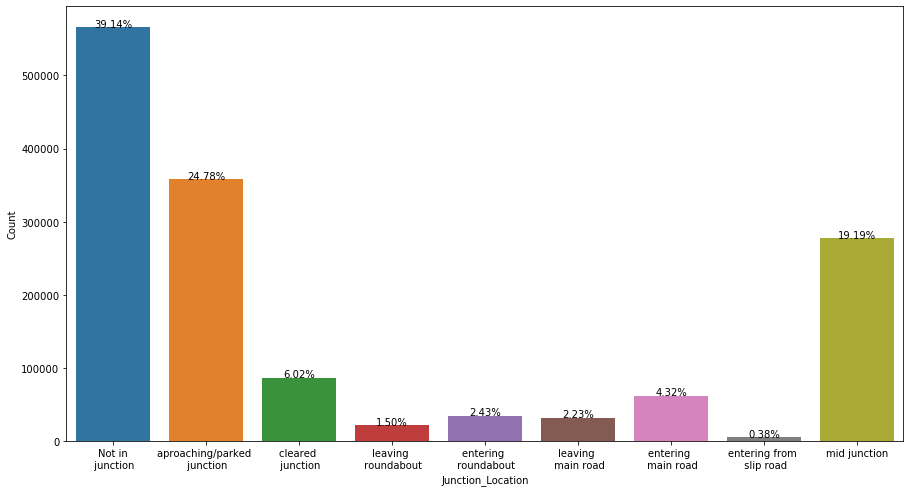

In [54]:
plt.figure(figsize=(15,8))
junctionplot = sns.countplot(x='Junction_Location',data=location)
junctionplot.set(xlabel='Junction_Location',ylabel='Count',xticklabels=['Not in\n junction','aproaching/parked \n junction','cleared \n junction','leaving \n roundabout','entering \n roundabout','leaving \n main road','entering \n main road','entering from \n slip road','mid junction'])
for p in junctionplot.patches: 
    height = p.get_height() 
    junctionplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(location))*100)+'%',  
      ha="center") 
plt.show()


In [55]:
vehicle_df['1st_Point_of_Impact'].value_counts()

 1.0    718959
 2.0    263387
 3.0    199958
 4.0    173531
 0.0     99304
-1.0       408
Name: 1st_Point_of_Impact, dtype: int64

In [56]:
vehicle_df['first_point_of_impact']=vehicle_df['1st_Point_of_Impact']
vehicle_df = vehicle_df[vehicle_df.first_point_of_impact != -1]

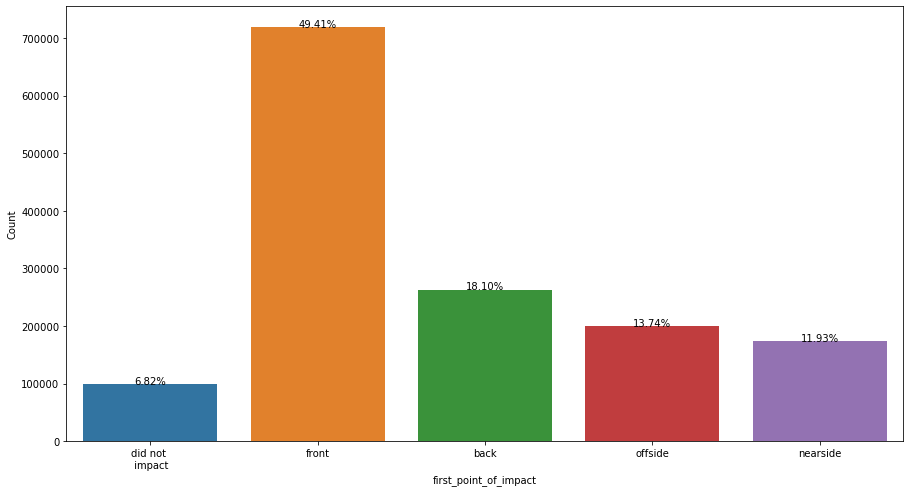

In [57]:
plt.figure(figsize=(15,8))
impactplot = sns.countplot(x='first_point_of_impact',data=vehicle_df)
impactplot.set(xlabel='first_point_of_impact',ylabel='Count',xticklabels=['did not \n impact','front','back','offside','nearside'])
for p in impactplot.patches: 
    height = p.get_height() 
    impactplot.text(p.get_x()+p.get_width()/2., 
      height + 2, 
      '{:1.2f}'.format((height/len(vehicle_df))*100)+'%',  
      ha="center") 
plt.show()

Severity of the Casualties

In [59]:
casual_df['Casualty_Severity'].value_counts()

3    20153
2     2686
1      214
Name: Casualty_Severity, dtype: int64

In [61]:
def map_severity(severity):
    if severity == 1:
        return 'Fatal'
    elif severity == 2:
        return 'Serious'
    elif severity == 3:
        return 'Slight'
    
casual_df['Casualty_Severity'] = casual_df['Casualty_Severity'].apply(map_severity)

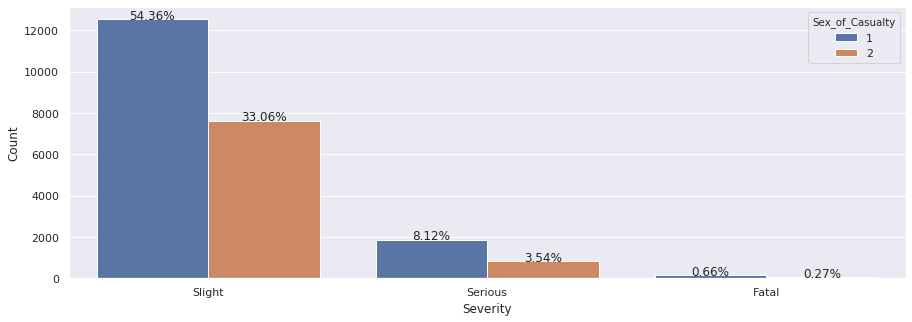

In [63]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
severityplot = sns.countplot(x='Casualty_Severity',hue='Sex_of_Casualty',data=casual_df,order=['Slight','Serious','Fatal'])
severityplot.set(xlabel='Severity', ylabel='Count')
for p in severityplot.patches: 
    height = p.get_height() 
    severityplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(casual_df))*100)+'%',  
      ha="center") 


PREDICTIVE MODELLING

PREDICTION OF FATAL ACCIDENTS

In [64]:
fatal_df=pd.DataFrame(data=df,columns=['Sex_of_Driver','Age_of_Driver','Vehicle_Type','Month','Accident_Severity'])

In [65]:
fatal_df=fatal_df[(fatal_df.Sex_of_Driver!=-1) & (fatal_df.Vehicle_Type!=-1) & (fatal_df.Sex_of_Driver!=-1) & (fatal_df.Sex_of_Driver!=3)]
fatal_df.head()

,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity
0,2.0,74.0,9,1,2
1,1.0,42.0,11,1,3
2,1.0,35.0,11,1,3
3,1.0,62.0,9,1,3
4,2.0,49.0,9,1,3


In [66]:
acc=pd.get_dummies(data=fatal_df,columns=['Accident_Severity'])
sex=pd.get_dummies(data=fatal_df,columns=['Sex_of_Driver'])

In [67]:
sex.head()

,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Sex_of_Driver_1.0,Sex_of_Driver_2.0
0,74.0,9,1,2,0,1
1,42.0,11,1,3,1,0
2,35.0,11,1,3,1,0
3,62.0,9,1,3,1,0
4,49.0,9,1,3,0,1


In [74]:
fatal_df=pd.concat([fatal_df,acc['Accident_Severity_1'],sex['Sex_of_Driver_1.0']],axis=1)
fatal_df.head()

,Age_of_Driver,Vehicle_Type,Month,Accident_Severity_1,Sex_of_Driver_1.0
0,74.0,9,1,0,0
1,42.0,11,1,0,1
2,35.0,11,1,0,1
3,62.0,9,1,0,1
4,49.0,9,1,0,0


Accident_Severity_1 corresponds to fatal accident and Sex_of_Driver_1.0 corresponds to male driver.

In [76]:
X=fatal_df.drop('Accident_Severity_1',axis=1)
y=fatal_df['Accident_Severity_1']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

DECISION TREE

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtree= DecisionTreeClassifier()

In [81]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
predictions= dtree.predict(X_test)

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9854
           1       0.20      0.04      0.06       138

    accuracy                           0.98      9992
   macro avg       0.59      0.52      0.53      9992
weighted avg       0.98      0.98      0.98      9992



In [85]:
print(confusion_matrix(y_test,predictions))

[[9834   20]
 [ 133    5]]


THE MODEL COULD DO BETTER WITH BETTER DATA ENGINEERING.